In [1]:
import pandas as pd
rawTrain = pd.read_csv("california_housing_test.csv")

In [2]:
features = rawTrain.drop(columns='median_house_value')
target = rawTrain['median_house_value']

In [3]:
features.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.00,-0.93,-0.06,0.05,0.07,0.11,0.05,-0.02
latitude,-0.93,1.00,-0.03,-0.04,-0.07,-0.12,-0.07,-0.07
housing_median_age,-0.06,-0.03,1.00,-0.37,-0.32,-0.30,-0.31,-0.14
total_rooms,0.05,-0.04,-0.37,1.00,0.94,0.84,0.91,0.22
total_bedrooms,0.07,-0.07,-0.32,0.94,1.00,0.86,0.97,0.02
population,0.11,-0.12,-0.30,0.84,0.86,1.00,0.90,0.03
households,0.05,-0.07,-0.31,0.91,0.97,0.90,1.00,0.05
median_income,-0.02,-0.07,-0.14,0.22,0.02,0.03,0.05,1.00


In [4]:
import myLib as my

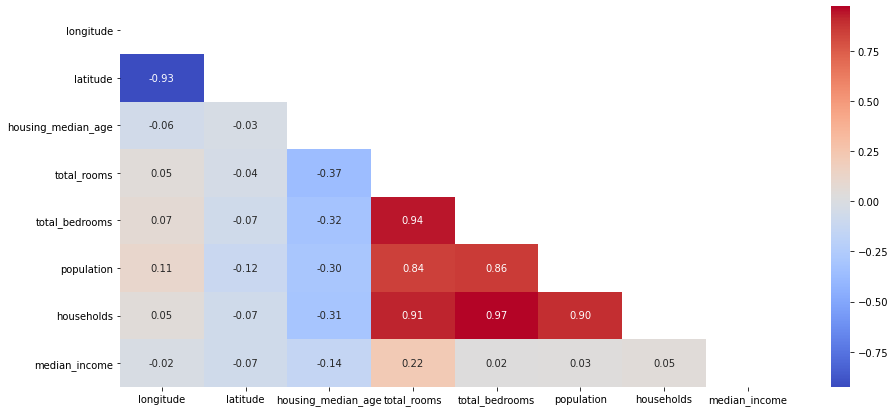

In [5]:
my.prettyCorr(features)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
features.values

array([[-122.05  ,   37.37  ,   27.    , ..., 1537.    ,  606.    ,
           6.6085],
       [-118.3   ,   34.26  ,   43.    , ...,  809.    ,  277.    ,
           3.599 ],
       [-117.81  ,   33.78  ,   27.    , ..., 1484.    ,  495.    ,
           5.7934],
       ...,
       [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
           2.2895],
       [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
           3.2708],
       [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
           8.5608]])

In [8]:
[variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

[635.7469265731369,
 559.4040073891116,
 7.485311851585184,
 34.7207326777759,
 83.12615178168858,
 16.38722400085988,
 69.61641817903086,
 8.646576991853522]

In [9]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [10]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [11]:
variance_inflation_factor(features.values, 0)

635.7469265731369

In [12]:
my.vif(features)

,vif factor,features
0,635.746927,longitude
1,559.404007,latitude
2,7.485312,housing_median_age
3,34.720733,total_rooms
4,83.126152,total_bedrooms
5,16.387224,population
6,69.616418,households
7,8.646577,median_income


In [13]:
my.vif(features.drop(columns=['longitude', 'latitude']))

,vif factor,features
0,3.665781,housing_median_age
1,30.880101,total_rooms
2,75.244668,total_bedrooms
3,15.078554,population
4,68.399784,households
5,5.008506,median_income


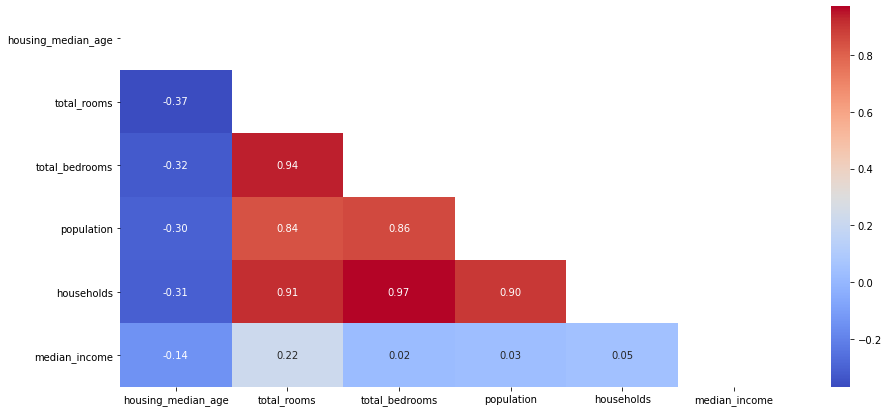

In [14]:
my.prettyCorr(features.drop(columns=['longitude', 'latitude']))

In [15]:
my.forward_select(features, target)

model                                     LinearRegression()
score                                               0.619331
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [16]:
my.backward_drop(features, target)

model                                     LinearRegression()
score                                               0.618278
columns    [longitude, latitude, housing_median_age, tota...
Name: 1, dtype: object

In [17]:
my.step_wise(features, target)

model                                     LinearRegression()
score                                               0.619331
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [18]:
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(features, target)

In [20]:
eli5.show_weights(model, feature_names = features.columns.tolist())

Weight?,Feature
+39472.983,median_income
+1188.308,housing_median_age
+101.483,total_bedrooms
+54.011,households
-8.023,total_rooms
-37.206,population
-42403.236,latitude
-43006.064,longitude
-3617912.112,<BIAS>


In [21]:
model = LinearRegression().fit(features, target)
perm = PermutationImportance(model, random_state=123).fit(features, target)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
1.2765 ± 0.0303,latitude
1.1543 ± 0.0607,longitude
0.8264 ± 0.0243,median_income
0.2730 ± 0.0111,total_bedrooms
0.2312 ± 0.0092,population
0.0616 ± 0.0061,households
0.0477 ± 0.0086,total_rooms
0.0356 ± 0.0056,housing_median_age


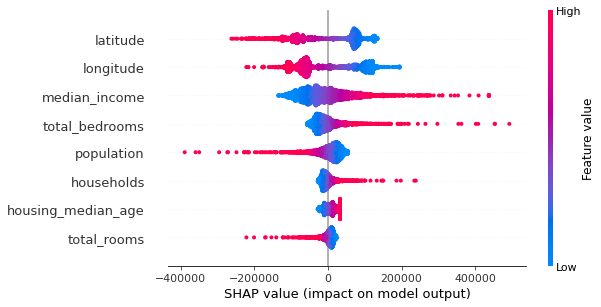

In [29]:
model = LinearRegression().fit(features, target)
explainer = shap.LinearExplainer(model, masker=features)
shap_value = explainer.shap_values(X=features)
shap.summary_plot(shap_value, features)

In [30]:
from sklearn.feature_selection import RFE
model = LinearRegression().fit(features, target)
feature_selector = RFE(model, n_features_to_select=3)
feature_selector = feature_selector.fit(features, target)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
col = features.columns

In [40]:
scaler = StandardScaler()
feature_scaled = features.copy()
feature_scaled[col] = scaler.fit_transform(features[col])

In [41]:
feature_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.233729,0.814633,-0.147000,0.596418,0.315337,0.130246,0.317734,1.510745
1,0.646344,-0.645931,1.127565,-0.505550,-0.529255,-0.576296,-0.582743,-0.112324
2,0.892007,-0.871356,-0.147000,0.459078,-0.055225,0.078808,0.013926,1.071149
3,0.616263,-0.852570,-0.067340,-1.175083,-1.239098,-1.313894,-1.310788,1.255865
4,-0.040509,0.326213,-0.784282,-0.630362,-0.688068,-0.536504,-0.692223,-0.469081
...,...,...,...,...,...,...,...,...
2995,-0.135766,-0.570789,-0.465641,-0.533389,0.269618,-0.140531,0.320471,-1.417467
2996,0.726560,-0.739858,-0.147000,1.233008,1.328367,2.031502,1.494650,-0.224718
2997,-0.055550,0.312124,-1.501225,-0.762599,-0.791536,-0.688877,-0.738753,-0.818558
2998,1.237940,-0.721072,0.888584,-1.161627,-1.241504,-1.316806,-1.302577,-0.289327


In [42]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


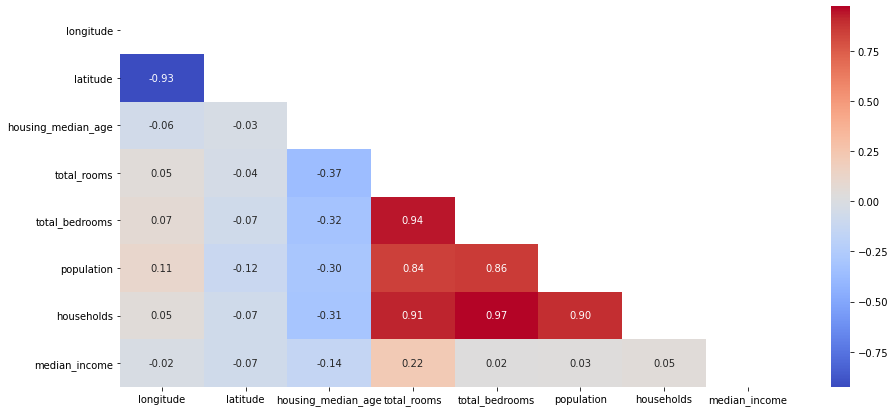

In [43]:
my.prettyCorr(feature_scaled)

In [45]:
result = my.forward_select(feature_scaled, target)
result

model                                     LinearRegression()
score                                               0.619331
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [47]:
model = LinearRegression().fit(features, target)
perm = PermutationImportance(model, random_state=123).fit(features, target)
eli5.show_weights(perm, feature_names = feature_scaled.columns.tolist())

Weight,Feature
1.2765 ± 0.0303,latitude
1.1543 ± 0.0607,longitude
0.8264 ± 0.0243,median_income
0.2730 ± 0.0111,total_bedrooms
0.2312 ± 0.0092,population
0.0616 ± 0.0061,households
0.0477 ± 0.0086,total_rooms
0.0356 ± 0.0056,housing_median_age


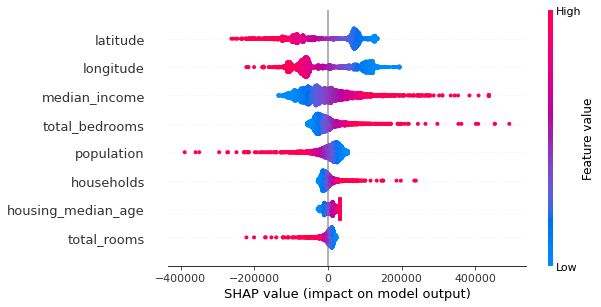

In [48]:
model = LinearRegression().fit(feature_scaled, target)
explainer = shap.LinearExplainer(model, feature_scaled)
shap_value = explainer.shap_values(feature_scaled)
shap.summary_plot(shap_value, feature_scaled)

In [49]:
from sklearn.feature_selection import RFE
model = LinearRegression().fit(feature_scaled, target)
feature_selector = RFE(estimator=model, n_features_to_select=3)
feature_selector = feature_selector.fit(features, target)

In [50]:
feature_scaled.loc[:, feature_selector.support_]

,longitude,latitude,median_income
0,-1.233729,0.814633,1.510745
1,0.646344,-0.645931,-0.112324
2,0.892007,-0.871356,1.071149
3,0.616263,-0.852570,1.255865
4,-0.040509,0.326213,-0.469081
...,...,...,...
2995,-0.135766,-0.570789,-1.417467
2996,0.726560,-0.739858,-0.224718
2997,-0.055550,0.312124,-0.818558
2998,1.237940,-0.721072,-0.289327


In [62]:
model.coef_

array([-85780.05795061, -90289.82760546,  14917.19163926, -17291.79662685,
        42174.62413615, -38336.17534665,  19733.68570481,  73190.90847496])

In [65]:
model = LinearRegression().fit(feature_scaled, target)
model.coef_

array([-85780.05795061, -90289.82760546,  14917.19163926, -17291.79662685,
        42174.62413615, -38336.17534665,  19733.68570481,  73190.90847496])

In [68]:
model.intercept_

205846.27499999985

In [93]:
model.coef_

array([-85780.05795061, -90289.82760546,  14917.19163926, -17291.79662685,
        42174.62413615, -38336.17534665,  19733.68570481,  73190.90847496])

In [95]:
features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [119]:
tmp = pd.DataFrame(columns=features.columns)
for i in range(len(tmp.columns)):
    tmp[tmp.columns[i]] = model.coef_[i]
tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [112]:
tmp[[tmp.columns[2]]] = 2

In [135]:
tmp = pd.DataFrame([model.coef_], columns=feature_scaled.columns)
tmp['intercept'] = model.intercept_

In [138]:
cols = tmp.columns.tolist()

In [140]:
cols = cols[-1:] + cols[:-1]
cols

['intercept',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [141]:
tmp = tmp[cols]

In [146]:
tmp.round(decimals=0).T

,0
intercept,205846.0
longitude,-85780.0
latitude,-90290.0
housing_median_age,14917.0
total_rooms,-17292.0
total_bedrooms,42175.0
population,-38336.0
households,19734.0
median_income,73191.0


In [148]:
import statsmodels.api as sm
X = sm.add_constant(feature_scaled)
model2 = sm.OLS(target, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     610.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:59:19   Log-Likelihood:                -37712.
No. Observations:                3000   AIC:                         7.544e+04
Df Residuals:                    2991   BIC:                         7.550e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.058e+05   1274.239    161.544      0.000    2.03e+05    2.08e+05
longitude          -8.578e+04   3728.566    -23.006      0.000   -9.31e+04   -7.85e+04
latitude           -9.029e+04   3757.419    -24.030      0.000   -9.77e+04   -8.29e+04
housing_median_age  1.492e+04   1426.158     10.460      0.000    1.21e+04    1.77e+04
total_rooms        -1.729e+04   4843.752     -3.570      0.000   -2.68e+04   -7794.374
total_bedrooms      4.217e+04   7177.527      5.876      0.000    2.81e+04    5.62e+04
population         -3.834e+04   3059.058    -12.532      0.000   -4.43e+04   -3.23e+04
households          1.973e+04   6476.594      3.047      0.002    7034.655    3.24e+04
median_income       7.319e+04   1699.225     43.073      0.000    6.99e+04    7.65e+04
==============================================================================
Omnibus:                      758.858   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2445.448
Skew:                           1.265   Prob(JB):                         0.00
Kurtosis:                       6.629   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
tmp.T

,0
intercept,205846.275000
longitude,-85780.057951
latitude,-90289.827605
housing_median_age,14917.191639
total_rooms,-17291.796627
total_bedrooms,42174.624136
population,-38336.175347
households,19733.685705
median_income,73190.908475


In [152]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [181]:
ridgeModel = Ridge().fit(feature_scaled, target)

In [182]:
ridgeModel.coef_

array([-17.26799337, -46.80604893,  31.13012318,  53.98355292,
        27.59456911,  -0.70418757,  33.65098919, 227.5242601 ])

In [183]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [208]:
ridgeModel = Ridge(alpha=10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*100000000000000000000000000000000).fit(feature_scaled, target)

In [210]:
ridgeModel.coef_

array([-1.71898076e-281, -4.69690033e-281,  3.10153646e-281,
        5.44332911e-281,  2.79175448e-281, -4.04368386e-283,
        3.39900898e-281,  2.28247146e-280])

In [232]:
lassoModel = Lasso(alpha=100).fit(features, target)

In [233]:
lassoModel.coef_

array([-4.26365096e+04, -4.20588791e+04,  1.19311043e+03, -8.04762192e+00,
        1.01073458e+02, -3.72368867e+01,  5.47527803e+01,  3.94865801e+04])

In [234]:
elasticModel = ElasticNet(l1_ratio=0.5, alpha=0.01).fit(features, target)

In [235]:
elasticModel.coef_

array([-4.22192051e+04, -4.16697278e+04,  1.20010236e+03, -8.08477686e+00,
        1.00691902e+02, -3.72673788e+01,  5.55582432e+01,  3.95102101e+04])